# Library

In [1]:
install.packages("factoextra")
install.packages('clue')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(datasets)
library(factoextra)
library('clue')

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



# 1. Load data

In [3]:
# https://drive.google.com/file/d/1XwbUiWKV-3AECSkpdBOCaKlGG2sLqUkO/view?usp=drive_link
system('gdown --id 1XwbUiWKV-3AECSkpdBOCaKlGG2sLqUkO')

In [24]:
data_clustering = read.csv('clustering.csv')

## 2. Data Overview

In [25]:
head(data_clustering)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
6,LP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y


In [26]:
print(paste('data have:', dim(data_clustering)[1], 'rows  and ', dim(data_clustering)[2], 'columns'))

[1] "data have: 381 rows  and  13 columns"


In [27]:
summary(data_clustering)

   Loan_ID             Gender            Married           Dependents       
 Length:381         Length:381         Length:381         Length:381        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  Education         Self_Employed      ApplicantIncome CoapplicantIncome
 Length:381         Length:381         Min.   : 150    Min.   :    0    
 Class :character   Class :character   1st Qu.:2600    1st Qu.:    0    
 Mode  :character   Mode  :character   Median :3333    Median :  983    
                                       Mean   :3580    Mean   : 1277    
                   

In [28]:
# Do bài toán cần phân cụm dựa trên LoanAmount & ApplicantIncome --> lấy những cột cần thiết
data = data_clustering[, c("LoanAmount", "ApplicantIncome")]

In [29]:
head(data)

,LoanAmount,ApplicantIncome
,<dbl>,<int>
1,128,4583
2,66,3000
3,120,2583
4,141,6000
5,95,2333
6,70,3200


In [37]:
print(paste('data have:', dim(data)[1], 'rows  and ', dim(data)[2], 'columns'))

[1] "data have: 381 rows  and  2 columns"


In [30]:
# check NA data_sub
sprintf("Total NA of data = %d", sum(is.na(data)))

[1] "Total NA of data = 0"

## 3. Data preprocessing

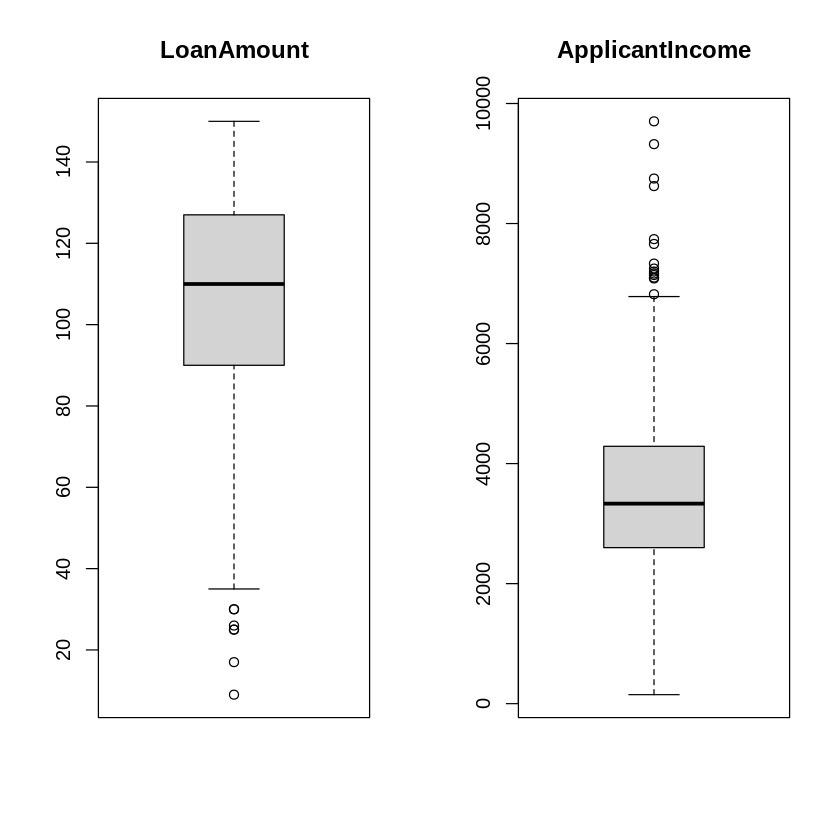

In [33]:
# Vẽ boxplot
col_names = colnames(data)
par(mfrow = c(1,2))

for (i in col_names) {
  boxplot(data[i], main =i)
}

Nhận xét: LoanAmount có nhiều outlier dưới & ApplicantIncome có nhiều outlier trên --> Cần xử lý

In [35]:
# Detail outliers
LoanAmount_outliers = boxplot.stats(data$LoanAmount)$out
ApplicantIncome_outliers = boxplot.stats(data$ApplicantIncome)$out

In [36]:
print('Outliers của LoanAmount là:')
print(LoanAmount_outliers)
print(paste('Numrows:', sum(data$LoanAmount %in% LoanAmount_outliers)))
print('Outliers của ApplicantIncome là:')
print(ApplicantIncome_outliers)
print(paste('Numrows:', sum(data$ApplicantIncome %in% ApplicantIncome_outliers)))

[1] "Outliers của LoanAmount là:"
[1] 17 25 25 30 30 26  9
[1] "Numrows: 7"
[1] "Outliers của ApplicantIncome là:"
 [1] 7660 7100 7333 9323 9703 7200 6822 8750 7167 7250 8624 7142 7085 7740
[1] "Numrows: 14"


In [38]:
# Thực hiện xóa outliers
print(paste('Before drop:', nrow(data)))

data <- data[!(data$LoanAmount %in% LoanAmount_outliers),]
data <- data[!(data$ApplicantIncome %in% ApplicantIncome_outliers),]

print(paste('After drop:', nrow(data)))

[1] "Before drop: 381"
[1] "After drop: 360"


## 4. Define relationship

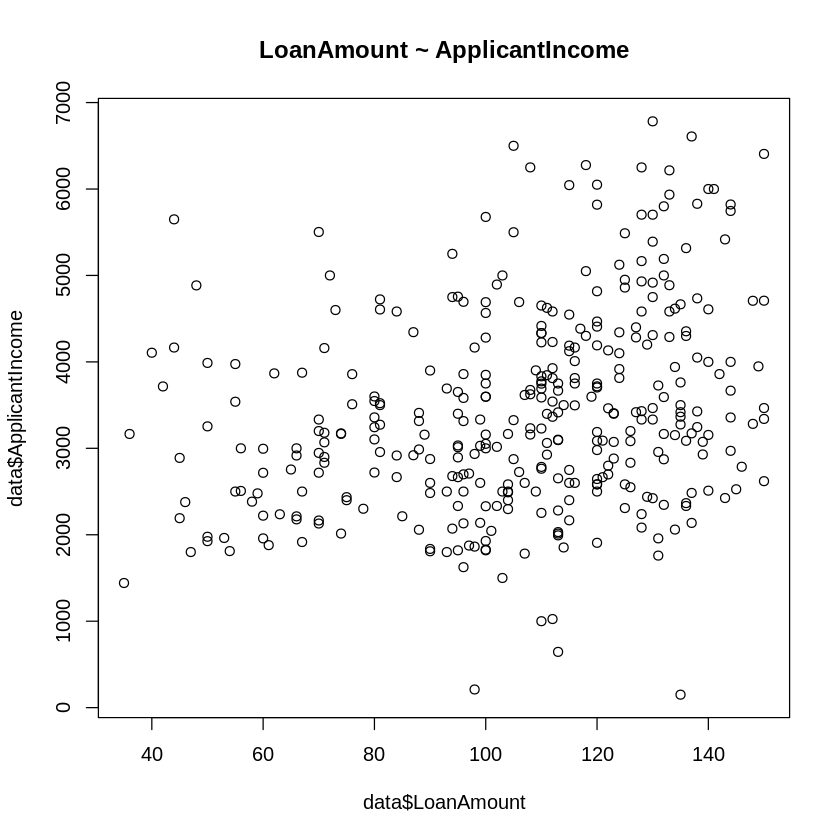

In [42]:
plot(x=data$LoanAmount, y = data$ApplicantIncome, main = 'LoanAmount ~ ApplicantIncome')

Nhận xét: Mối quan hệ giữa LoanAmount & ApplicantIncome tuy không rõ ràng lắm nhưng cũng có thể thấy được vói

## 5. Build model

In [43]:
# chon k clusters phu hop
wss = c()
for (i in 1:6) wss[i] <- sum(kmeans(data, centers = i, nstart = 20)$withinss)

In [44]:
print(wss)

[1] 485435231 170605323  87264805  52455398  35038167  25368451


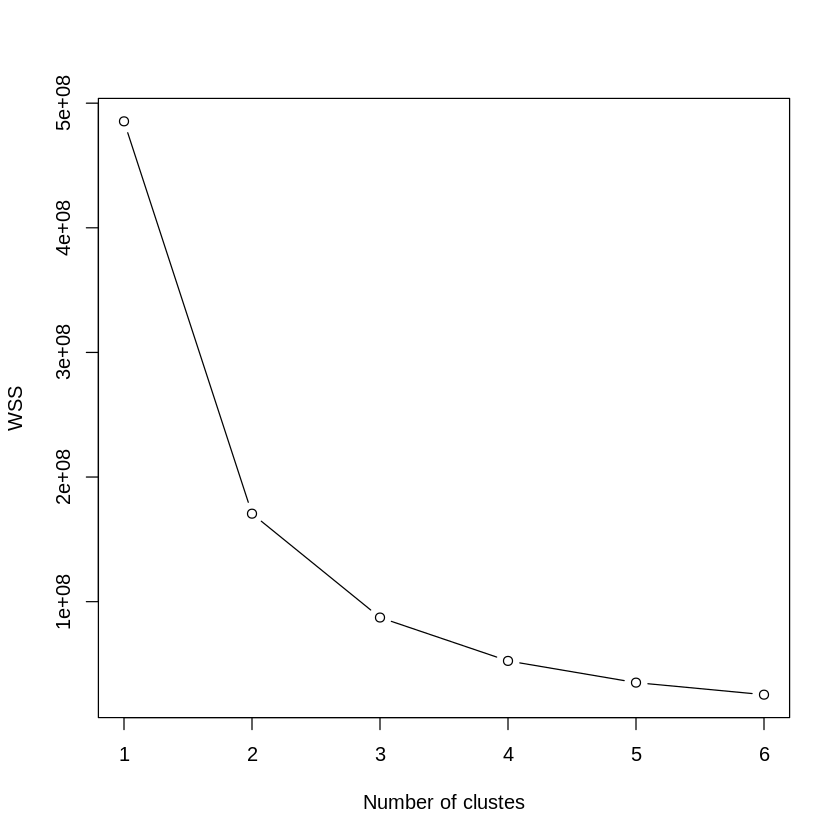

In [45]:
# Ve elbow chart để tìm khuỷu tay
plot (1:6, wss, type = 'b', xlab = 'Number of clustes', ylab = 'WSS')

Nhận xét: Chọn k=4 vì tại 4 wss bắt đầu không có nhiều sự thay đổi

In [59]:
# Xáo trộn dữ liệu để đảm bảo tính công bằng
set.seed(20)
dataCluster = kmeans(data, centers = 4, nstart = 20) # nstart = 20: chọn 20 hàng riêng biệt trong x làm trung tâm ban đầu

In [60]:
print(dataCluster)

K-means clustering with 4 clusters of sizes 31, 77, 113, 139

Cluster means:
  LoanAmount ApplicantIncome
1  122.61290        5848.032
2  112.15584        4449.312
3   97.89381        2203.646
4  105.56835        3317.446

Clustering vector:
  1   2   3   4   5   6   7   8  10  11  12  13  14  16  17  18  19  20  21  22 
  2   4   3   1   3   4   3   3   2   4   4   2   3   3   4   4   2   3   4   4 
 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42 
  2   4   3   4   4   4   3   3   2   2   4   1   1   3   2   3   4   2   2   3 
 43  44  45  46  47  48  49  51  52  53  54  55  56  57  58  59  60  61  62  63 
  3   4   4   3   4   2   4   2   3   4   2   4   3   4   4   2   3   4   3   4 
 64  65  67  68  69  70  71  72  74  75  76  77  78  79  80  81  82  83  84  86 
  4   2   3   3   2   3   2   4   3   1   4   2   3   2   3   4   4   3   3   2 
 87  88  89  90  91  93  94  95  96  97  98  99 101 102 103 104 105 106 107 108 
  2   4   2   3   3   2   1  

## 6. Tìm kết quả

Nhận xét: Model giúp chia data thành 4 nhóm.
* Nhóm 1: Khách hàng có trung bình Income khoảng 5848 thì có xu hướng vay số tiền trung bình khoảng 122.000

* Nhóm 3: Khách hàng có trung bình Income khoảng 4449 thì có xu hướng vay số tiền trung bình khoảng 112.000

* Nhóm 3: Khách hàng có trung bình Income khoảng 2203 thì có xu hướng vay số tiền trung bình khoảng 97.000

* Nhóm 3: Khách hàng có trung bình Income khoảng 3317 thì có xu hướng vay số tiền trung bình khoảng 105.000.

Chỉ số between_SS/total_SS = 89% cho thấy model giải thích được khá tốt, khoảng 89% data.

## 7. Visualize result

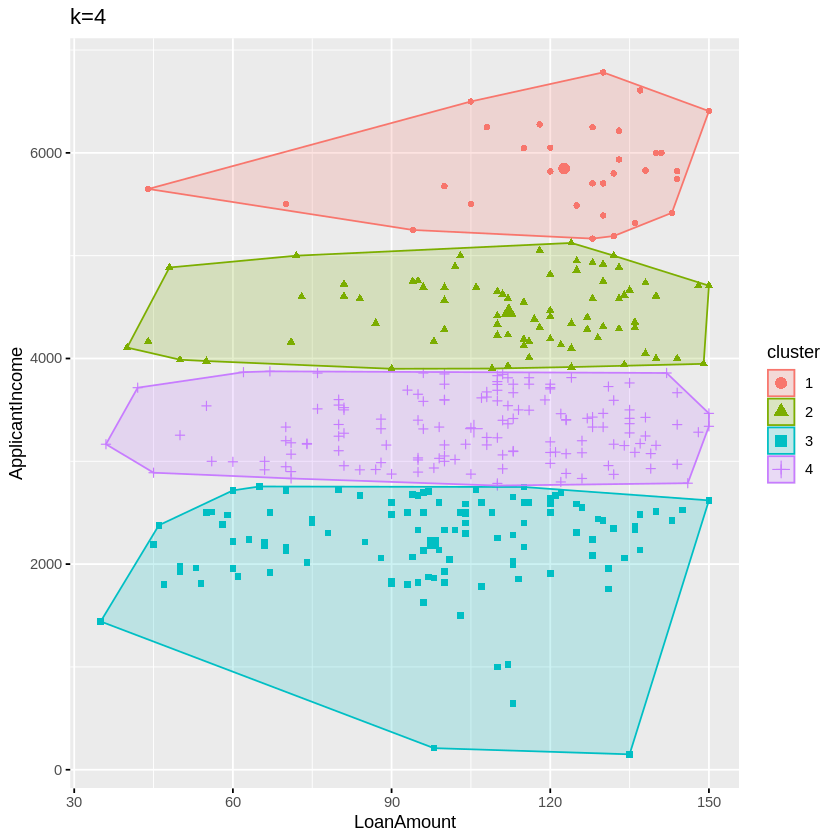

In [61]:
fviz_cluster(dataCluster, geom = 'point', data = data, stand=F) + ggtitle('k=4')

## 8. Nhận xét

Model giúp phân cụm khách hàng theo xu hướng LoanAmount & Income.

* Nhóm 1: Khách hàng có trung bình Income khoảng 5848 thì có xu hướng vay số tiền trung bình khoảng 122.000

* Nhóm 3: Khách hàng có trung bình Income khoảng 4449 thì có xu hướng vay số tiền trung bình khoảng 112.000

* Nhóm 3: Khách hàng có trung bình Income khoảng 2203 thì có xu hướng vay số tiền trung bình khoảng 97.000

* Nhóm 3: Khách hàng có trung bình Income khoảng 3317 thì có xu hướng vay số tiền trung bình khoảng 105.000.

Thông qua bài toán có thể thấy được rằng Income càng cao thì sẽ có xu hướng vay khoản vay lớn hơn
